# Assignment 6
### Do Question 6, and three more questions of your choice.

### 2. Probability space basics:

- What are the outcomes for rolling a single, fair **THREE**-sided die? What's the set of all events? What are the probabilities of all the events?
1. Outcomes: Each face has an equal chance., where the faces are $\{1,2,3\}$. So, $S=\{1,2,3\}$
2. Each subset of $S$ is an event (including the empty set and the full set). So the power set of $S$ is:
$\{\varnothing, \{1\}, \{2\}, \{3\}, \{1,2\}, \{1,3\}, \{2,3\}, \{1,2,3\}\}$
3. Each single outcome has probability $1/3$. Then the probability of each event is the sum of the probabilities of the outcomes in it:

In [23]:
import pandas as pd
data = {"Event": ["∅", "{1}", "{2}", "{3}", "{1,2}", "{1,3}", "{2,3}", "{1,2,3}"], "Probability": [0, 1/3, 1/3, 1/3, 2/3, 2/3, 2/3, 1]}
df = pd.DataFrame(data)
df

,Event,Probability
0,∅,0.000000
1,{1},0.333333
2,{2},0.333333
3,{3},0.333333
4,"{1,2}",0.666667
5,"{1,3}",0.666667
6,"{2,3}",0.666667
7,"{1,2,3}",1.000000




- What about flipping a fair coin twice? (Hint: There are 4 outcomes, and $2^{4} = 16$ events.)
1. Represent heads = H, tails = T. The sample space is $S=\{HH,HT,TH,TT\}$.
2. Each subset of $S$ is an event. Since there are 4 outcomes, the total number of events is $2^4=16$. Possible events include both heads, exactly one heads, at least on heads, certain events, both tails, exactly one tails, and at least one tails.
3. Sum of the probabilities of outcomes in the event. Each outcome has probability $1/4$ because the coin is fair.
- What about rolling the **THREE**-sided die twice, and adding the results? Don't write down the set of all the possible events, but describe briefly what it looks like and how large it is. (Hint: There are 5 outcomes, and $2^{5}=32$ possible events.)
1. The possible sums are: $2,3,4,5,6$
2. There are 5 outcomes, so the number of events is $2^5=32$. Each event is a subset of sums. Examples include sum is exactly 2, sum is at least 2, sum is exactly 6, and so on.
3. The probability of each event is the sum of probabilities of the individual sums. Each sum has its own probability depending on how many ways it can occur with two dice. For example:

        Sum = 2: only (1,1) → probability 1/9

        Sum = 3: (1,2) and (2,1) → probability 2/9

        Sum = 4: (1,3), (2,2), (3,1) → probability 3/9

        Sum = 5: (2,3), (3,2) → probability 2/9

        Sum = 6: (3,3) → probability 1/9

Obviously, a "three-sided die" doesn't exist, but this keeps you from spending a lot of time suffering in working out sets of events.


### 3. Random Variable Basics

- Imagine rolling a fair single six-sided die. There are 6 outcomes, all equally likely. Derive the sample space and the space of events. What are the probabilities of the outcomes and events? 
1. Outcomes are $S=\{1,2,3,4,5,6\}$.
2. All subsets of $S$. Since there are 6 outcomes, there are $2^6=64$ possible events.
3. Probability of each outcome is equally likely, $1/6$. 
4. The probability of each event is the sum of probabilities of outcomes in the event.
- Consider a random variable that assigns the square root of the number of pips on the die to each outcome. Write code to simulate rolling a single six-sided die and computing the value of the random variable. Simulate 5000 rolls and plot the mass function and ECDF of the random variable.

C:\Users\linod\AppData\Local\Temp\ipykernel_18480\464266217.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{v:.3f}" for v in values])


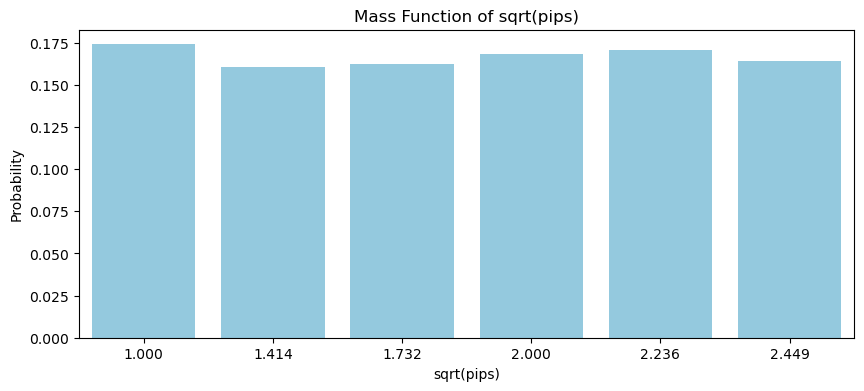

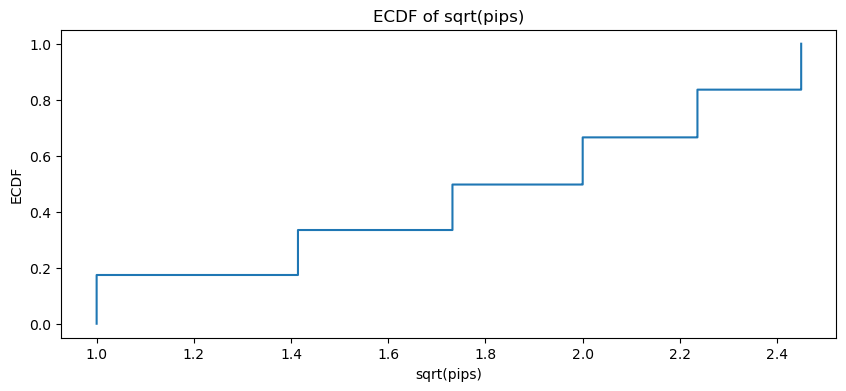

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

# Simulate 5000 rolls of a fair 6-sided die
rolls = np.random.randint(1, 7, size=5000)

# Random variable: square root of the number of pips
X = np.sqrt(rolls)

# Mass function
values, counts = np.unique(X, return_counts=True)
pmf = counts / counts.sum()

plt.figure(figsize=(10,4))
ax = sns.barplot(x=values, y=pmf, color='skyblue')
plt.xlabel('sqrt(pips)')
plt.ylabel('Probability')
plt.title('Mass Function of sqrt(pips)')

# Round the tick labels directly on the axis
ax.set_xticklabels([f"{v:.3f}" for v in values])
plt.show()

# ECDF
X_sorted = np.sort(X)
ecdf = np.arange(1, len(X_sorted)+1) / len(X_sorted)

plt.figure(figsize=(10,4))
plt.step(X_sorted, ecdf)
plt.xlabel('sqrt(pips)')
plt.ylabel('ECDF')
plt.title('ECDF of sqrt(pips)')
plt.show()

- Imagine rolling two fair six-sided die. Consider a random variable that adds up the pips on the dice. There are 11 outcomes (2 , 3, ..., 12), but not all are equally likely. Derive the sample space and **describe** the space of events. What are the probabilities of the outcomes?
1. The outcomes for this event are $S=\{2,3,4,5,6,7,8,9,10,11,12\}$
2. Each subset of $S$ is an event. There are $2^{11}=2048$ possible events.
3. The probabilities of outcomes are not all equally likely. We must count the ways to get each sum.

In [25]:
df = pd.DataFrame({
    "Sum": range(2,13),
    "Ways to get it": ["(1,1)","(1,2),(2,1)","(1,3),(2,2),(3,1)","4 ways","5 ways","6 ways","5 ways","4 ways","3 ways","2 ways","(6,6)"],
    "Probability": ["1/36","2/36","3/36","4/36","5/36","6/36","5/36","4/36","3/36","2/36","1/36"]
})
df

,Sum,Ways to get it,Probability
0,2,"(1,1)",1/36
1,3,"(1,2),(2,1)",2/36
2,4,"(1,3),(2,2),(3,1)",3/36
3,5,4 ways,4/36
4,6,5 ways,5/36
5,7,6 ways,6/36
6,8,5 ways,5/36
7,9,4 ways,4/36
8,10,3 ways,3/36
9,11,2 ways,2/36


- Write code to simulate the random variable (rolling two six-sided die and adding the results together). Simulate 10000 rolls and plot the mass function and ECDF.

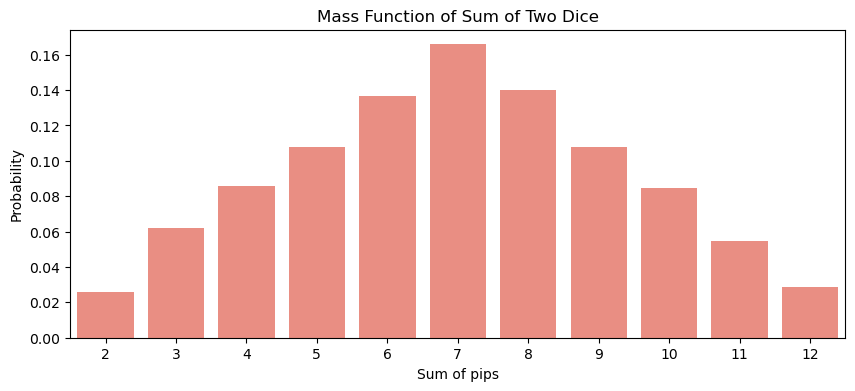

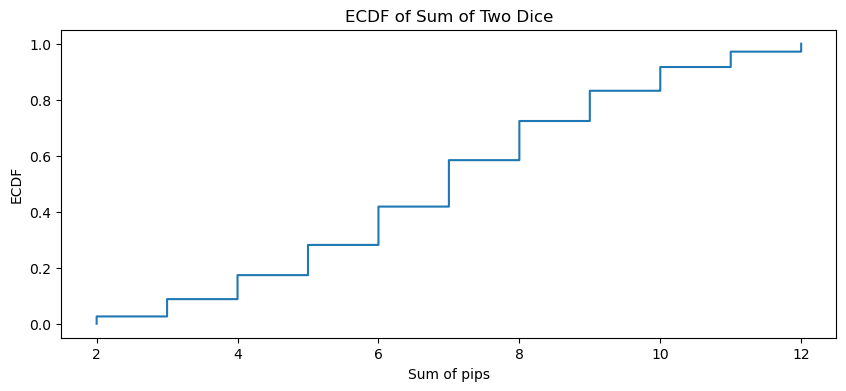

In [26]:
# Simulate 10000 rolls of two dice
rolls1 = np.random.randint(1, 7, size=10000)
rolls2 = np.random.randint(1, 7, size=10000)

# Random variable: sum of the pips
Y = rolls1 + rolls2

# Mass function
values, counts = np.unique(Y, return_counts=True)
pmf = counts / counts.sum()

plt.figure(figsize=(10,4))
sns.barplot(x=values, y=pmf, color='salmon')
plt.xlabel('Sum of pips')
plt.ylabel('Probability')
plt.title('Mass Function of Sum of Two Dice')
plt.show()

# ECDF
Y_sorted = np.sort(Y)
ecdf = np.arange(1, len(Y_sorted)+1) / len(Y_sorted)

plt.figure(figsize=(10,4))
plt.step(Y_sorted, ecdf)
plt.xlabel('Sum of pips')
plt.ylabel('ECDF')
plt.title('ECDF of Sum of Two Dice')
plt.show()

### 4. Roulette

This question will be easiest if you read the whole thing, and come up with a clear plan for how you'll write the code.

Roulette is a betting game. There are 37 possible outcomes: A green 0, and the numbers 1 to 36 in red and black. Here is a picture of the (American, not Euro, it has an extra green 00) betting board:

![Roulette](./src/euro_roulette.jpg)

To bet, you must pay a dollar, but then you get payouts that depend on how many slots are in your bet
- Basic bets:
    - Red or Black slots
    - Odd or Even slots
    - A single slots, like 20
- More complex bets:
    - Split: Two adjacent slots (e.g. {1,2})
    - Square: Four adjacent slots (e.g. {1,2,4,5})
    - Street: Three slots in a row (e.g. {1,2,3})
    - Line: Six slots (e.g. {1,2,3,4,5,6})
In general, you can only bet on 1, 2, 3, 4, 6 slots, 12 slots, or 18 slots. If your bet occurs when the wheel is spun, you gain 36/K-1 where $K$ is the number of slots you bet on; if not, you lose a dollar and get -1.

- Write code to model spinning the roulette wheel, including the colors and numbers (you could make two lists of number and color and draw a random number between 0 and 37... or use a dataframe with color and number variables and sample it... or use a dict with key to number/color pairs...)
- Describe the probability space associated with the roulette wheel: Outcomes, events, probabilities (If there are 37 outcomes, there are $2^{37}= 137,438,953,472$ events, by the way)
- You wrote code to generate a spin of the roulette wheel. Now write a function that takes a basic or complex bet as an argument, and returns the result for the player (win or lose, and the payout 36/K-1 or -1)
- Simulate betting on red, betting on odd, betting on 7, a split, and a line 1000 times each.
- Compute the average values for the bets you just simulated. What are the expected average payoffs?

In [27]:
numbers = list(range(37))
colors = ["green"] + ["red","black","red","black","red","black","red","black","red","black",
                       "black","red","black","red","black","red","black","red","black",
                       "red","black","red","black","red","black","red","black","red","black",
                       "black","red","black","red","black","red","black"]
wheel = pd.DataFrame({"Number": numbers, "Color": colors})

* There are 37 outcomes, each with an associated number and color. Each outcome has a $1/37$ chance in occuring on a fair wheel.
* There are $2^{37}$ possible events, which each describe a possible subset of outcomes

In [28]:
def spin_wheel():
    return wheel.sample(1).iloc[0]

def bet_result(bet_slots):
    spin = spin_wheel()
    K = len(bet_slots)
    if spin.Number in bet_slots:
        return 36/K - 1
    else:
        return -1

In [29]:
np.random.seed(426786)

# Example bets
bets = {
    "red": wheel[wheel.Color=="red"]["Number"].tolist(),
    "odd": [n for n in numbers if n % 2 == 1],
    "7": [7],
    "split_1_2": [1,2],
    "line_1_6": [1,2,3,4,5,6]
}

sim_results = {name: [bet_result(slots) for _ in range(1000)] for name, slots in bets.items()}

In [30]:
avg_payoffs = {name: np.mean(results) for name, results in sim_results.items()}
pd.DataFrame.from_dict(avg_payoffs, orient="index", columns=["Average payoff"])

,Average payoff
red,-0.013176
odd,-0.026000
7,-0.388000
split_1_2,-0.100000
line_1_6,-0.136000


### 6. Some Common Distributions

For the following distributions:
- Determine the support
- Compute the density from the distribution for the logistic and exponential distributions (take a derivative)
- Plot the density and distribution for a variety of parameter values
- Take a sample of 1000 draws $(x_1, x_2, ..., x_{1000})$ from the distribution, plot a KDE and ECDF, visually compare with the theoretical pdf/cdf
- Find an example of this general type of PDF/CDF from the Metabric cancer data

You can use https://docs.scipy.org/doc/scipy/reference/stats.html to generate values for the pdf/cdf and generate samples of random variates.


- Logistic distribution (similar to normal): 
$$
F(x; \sigma) = \dfrac{1}{1+e^{-x/\sigma}} 
$$
with $\sigma >0$.

Since $e^{-x/\sigma}$ is always positive for any value $x$, the support of the logistic distribution is $=(-\infty, \infty)$.

In [31]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import math
import os

In [32]:
def logistic_cdf(x, s=1.0, mu=0.0):
    return 1.0 / (1.0 + np.exp(-(x - mu) / s))

def logistic_pdf(x, s=1.0, mu=0.0):
    z = np.exp(-(x - mu) / s)
    return (1.0 / s) * z / (1 + z)**2

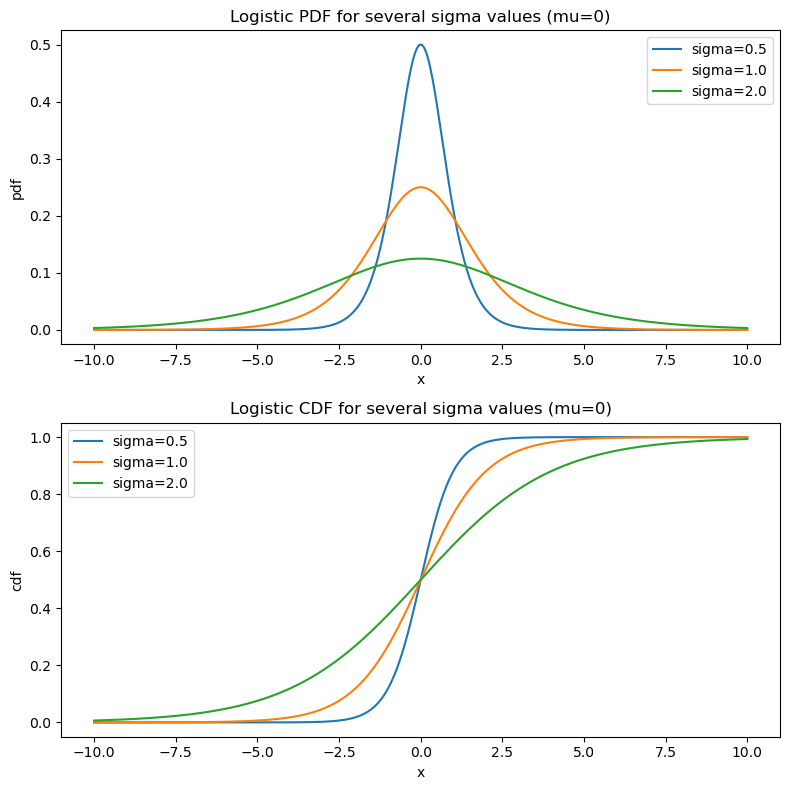

In [33]:
xs = np.linspace(-10, 10, 1000)
sigmas = [0.5, 1.0, 2.0]

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
for s in sigmas:
    axes[0].plot(xs, logistic_pdf(xs, s=s), label=f"sigma={s}")
axes[0].set_title("Logistic PDF for several sigma values (mu=0)")
axes[0].legend()
axes[0].set_xlabel("x")
axes[0].set_ylabel("pdf")

for s in sigmas:
    axes[1].plot(xs, logistic_cdf(xs, s=s), label=f"sigma={s}")
axes[1].set_title("Logistic CDF for several sigma values (mu=0)")
axes[1].legend()
axes[1].set_xlabel("x")
axes[1].set_ylabel("cdf")
plt.tight_layout()
plt.show()

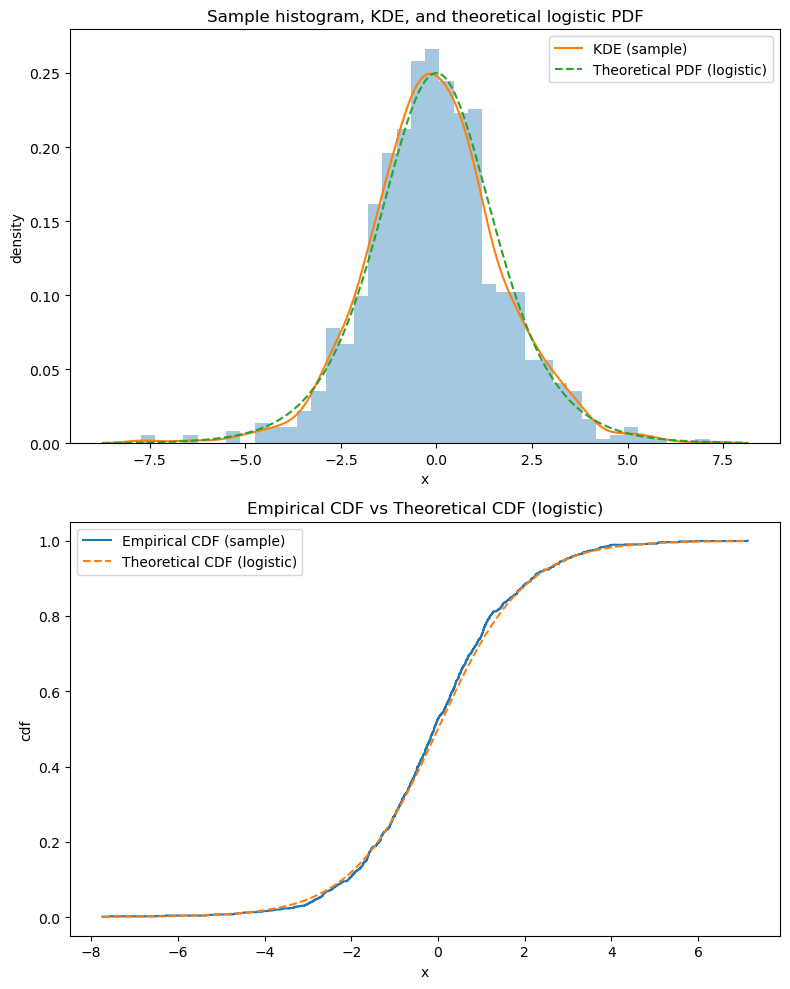

In [34]:
rng = np.random.default_rng(12345)
n = 1000
s_sample = 1.0
mu_sample = 0.0

# Inverse CDF sampling: x = mu + s * log(u/(1-u))
u = rng.random(n)
sample = mu_sample + s_sample * np.log(u / (1 - u))

# KDE estimate
kde = gaussian_kde(sample)
xs_kde = np.linspace(sample.min() - 1, sample.max() + 1, 1000)
kde_vals = kde(xs_kde)
theo_pdf = logistic_pdf(xs_kde, s=s_sample, mu=mu_sample)

# Plot histogram + KDE + theoretical pdf
fig, ax = plt.subplots(2, 1, figsize=(8, 10))
ax[0].hist(sample, bins=40, density=True, alpha=0.4)
ax[0].plot(xs_kde, kde_vals, label="KDE (sample)")
ax[0].plot(xs_kde, theo_pdf, linestyle='--', label="Theoretical PDF (logistic)")
ax[0].set_title("Sample histogram, KDE, and theoretical logistic PDF")
ax[0].legend()
ax[0].set_xlabel("x")
ax[0].set_ylabel("density")

# ECDF
xs_sorted = np.sort(sample)
ecdf = np.arange(1, n+1) / n
theo_cdf = logistic_cdf(xs_sorted, s=s_sample, mu=mu_sample)
ax[1].step(xs_sorted, ecdf, where='post', label="Empirical CDF (sample)")
ax[1].plot(xs_sorted, theo_cdf, linestyle='--', label="Theoretical CDF (logistic)")
ax[1].set_title("Empirical CDF vs Theoretical CDF (logistic)")
ax[1].legend()
ax[1].set_xlabel("x")
ax[1].set_ylabel("cdf")
plt.tight_layout()
plt.show()

In [35]:
file_path = "data/metabric.csv"  
metabric = pd.read_csv(file_path)

numeric_cols = metabric.select_dtypes(include=[np.number]).columns.tolist()

col_stats = []
for c in numeric_cols:
    s_col = metabric[c].dropna()
    if len(s_col) > 10:
        skew = s_col.skew()
        iqr = np.percentile(s_col, 75) - np.percentile(s_col, 25)
        median = np.median(s_col)
        col_stats.append((c, skew, median, iqr, s_col.min(), s_col.max(), s_col.count()))

col_stats_df = pd.DataFrame(col_stats, columns=["col", "skew", "median", "IQR", "min", "max", "n"])
col_stats_df["abs_skew"] = col_stats_df["skew"].abs()
col_stats_df = col_stats_df.sort_values(["abs_skew", "n"], ascending=[True, False])
col_stats_df.head(1)

,col,skew,median,IQR,min,max,n,abs_skew
3,Nottingham prognostic index,-0.047671,4.042,1.99,1.02,6.36,1343,0.047671


Since the column, Nottingham prognostic index, has the smallest absolute skew, it is the best example of a logistic CDF/PDF.

- Exponential distribution (similar to log-normal):
$$
F_X(x) = \begin{cases}
0, & x<0 \\
1 - e^{-\lambda x}, & x \ge 0,
\end{cases}
$$
with $\lambda > 0$.

Given $F_X(x)$, the support of the logistic distribution is $=[0, \infty)$.

In [36]:
def exponential_cdf(x, lam=1.0):
    return np.where(x >= 0, 1 - np.exp(-lam * x), 0.0)

def exponential_pdf(x, lam=1.0):
    return np.where(x >= 0, lam * np.exp(-lam * x), 0.0)

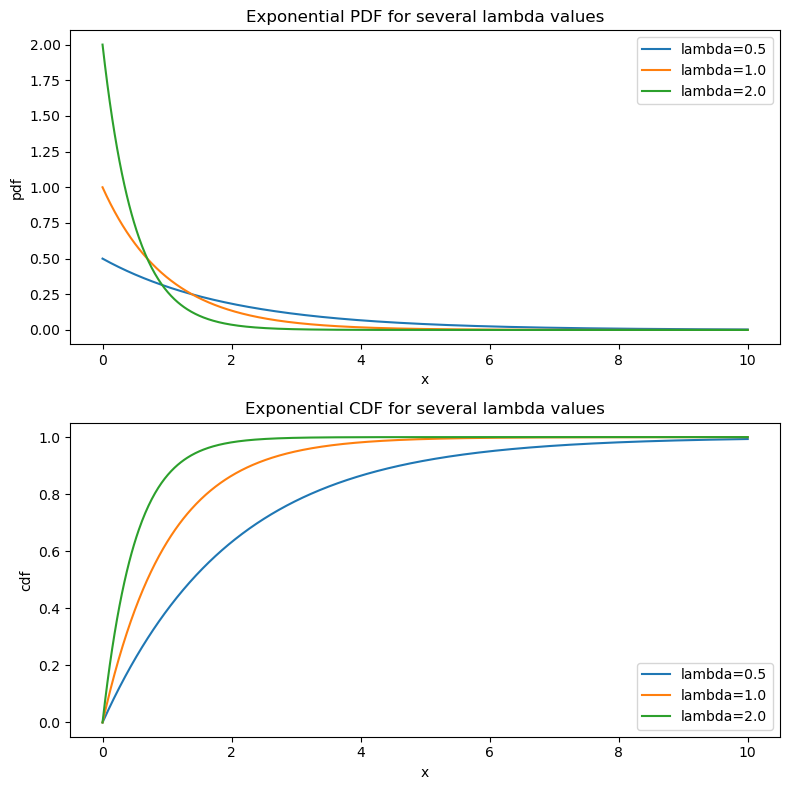

In [37]:
xs_exp = np.linspace(0, 10, 800)
lambdas = [0.5, 1.0, 2.0]

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
for lam in lambdas:
    axes[0].plot(xs_exp, exponential_pdf(xs_exp, lam=lam), label=f"lambda={lam}")
axes[0].set_title("Exponential PDF for several lambda values")
axes[0].legend()
axes[0].set_xlabel("x")
axes[0].set_ylabel("pdf")

for lam in lambdas:
    axes[1].plot(xs_exp, exponential_cdf(xs_exp, lam=lam), label=f"lambda={lam}")
axes[1].set_title("Exponential CDF for several lambda values")
axes[1].legend()
axes[1].set_xlabel("x")
axes[1].set_ylabel("cdf")
plt.tight_layout()
plt.show()

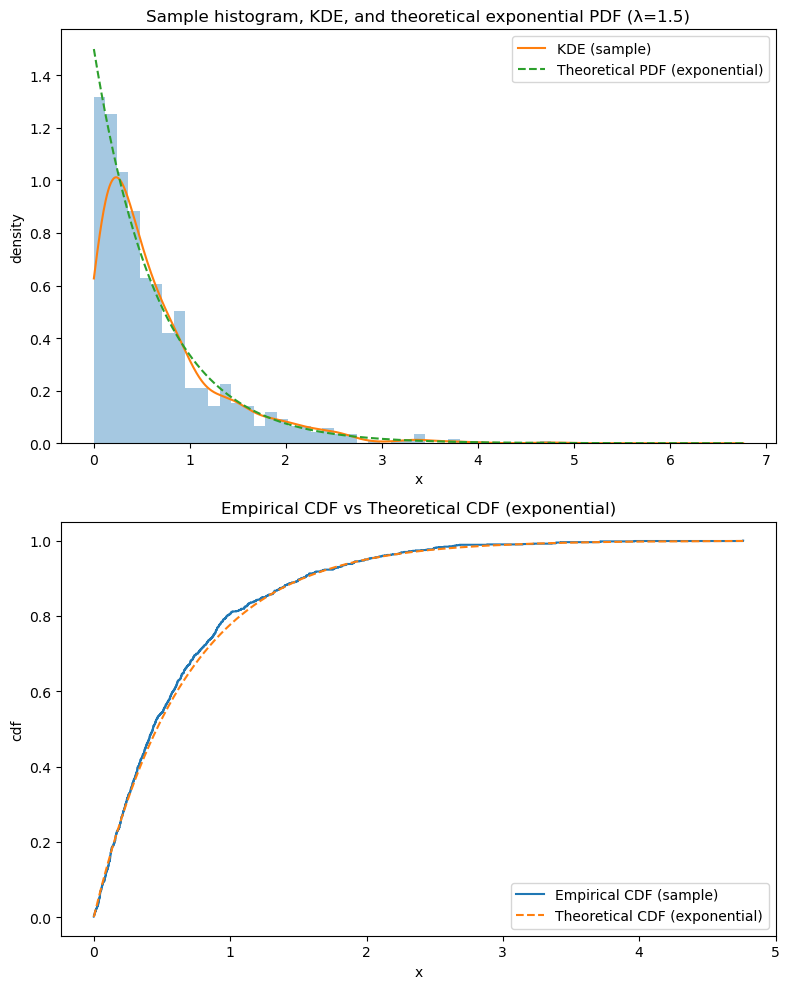

In [38]:
rng = np.random.default_rng(12345)
n = 1000
lam = 1.5  

u = rng.random(n)
sample = -np.log(1 - u) / lam

kde = gaussian_kde(sample)
xs_kde = np.linspace(0, sample.max() + 2, 1000)
kde_vals = kde(xs_kde)
theo_pdf = exponential_pdf(xs_kde, lam=lam)

fig, ax = plt.subplots(2, 1, figsize=(8, 10))


ax[0].hist(sample, bins=40, density=True, alpha=0.4)
ax[0].plot(xs_kde, kde_vals, label="KDE (sample)")
ax[0].plot(xs_kde, theo_pdf, linestyle='--', label="Theoretical PDF (exponential)")
ax[0].set_title(f"Sample histogram, KDE, and theoretical exponential PDF (λ={lam})")
ax[0].legend()
ax[0].set_xlabel("x")
ax[0].set_ylabel("density")

xs_sorted = np.sort(sample)
ecdf = np.arange(1, n+1) / n
theo_cdf = exponential_cdf(xs_sorted, lam=lam)

ax[1].step(xs_sorted, ecdf, where='post', label="Empirical CDF (sample)")
ax[1].plot(xs_sorted, theo_cdf, linestyle='--', label="Theoretical CDF (exponential)")
ax[1].set_title("Empirical CDF vs Theoretical CDF (exponential)")
ax[1].legend()
ax[1].set_xlabel("x")
ax[1].set_ylabel("cdf")

plt.tight_layout()
plt.show()

In [39]:
col_stats_df = col_stats_df.sort_values(["skew", "n"], ascending=[False, False])
col_stats_df.head(1)

,col,skew,median,IQR,min,max,n,abs_skew
1,Lymph nodes examined positive,3.784721,0.0,2.0,0.0,41.0,1343,3.784721


This code block picks the most right-skewed numeric column of the previously defined data frame. The exponential distribution is strictly right-skewed.

In this case, "Lymph nodes examined positive" most closely follows an exponential distribution from the metabric dataset.

Larger skew means a long right tail that matches the exponential shape. Additionally, it breaks ties by sorting $n$ descending, so it prefers columns with more non-missing values.

- Negative Binomial (similar to Poisson): The probability mass function for positive integers is:
$$
f(k;r,p) = \dfrac{(k+r-1)!}{k!(r-1)!}(1-p)^k p^r, \quad \text{ for $k=0,...n$}
$$
You can interpret this as follows: Flip a coin that comes up heads with probability $p$ until you get $r$ heads, and then stop. What is the probability of stopping at each $k=0,1,2,...$?

- Categorical (similar to Bernoulli): The probability mass function over $k = 1, 2, ..., K$ categories is
$$
f(k;p_1,...,p_K) = p_1^{k=1}p_2^{k=2}...p_K^{k=K}
$$
where $0 \le p_i \le 1$ and $ \sum_{k=1}^K p_k = 1$.